In [39]:
!pip install supervision
!pip install ollama
!pip install transformers
!pip install inference-gpu

In [7]:
import os
import numpy as np
import supervision as sv
import ollama
import transformers
from inference import get_model


In [ ]:
!pip install 'inference[sam]'
!pip install 'inference[gaze]'
!pip install 'inference[grounding-dino]'
!pip install 'inference[yolo-world]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━

INFO: pip is looking at multiple versions of mediapipe to determine which version is compatible with other requirements. This could take a while.
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
^C


In [1]:
from pathlib import Path

HOME = Path.cwd()
print("HOME:", HOME)

HOME: /content


In [2]:
SOURCE_VIDEO_PATH ='/content/Warriors & Lakers Instant Classic - 2021 Play-In Tournament 🔥｜ NBA Classic Game.mp4'
SEGMENTED_VIDEO_PATH = '/content/extracted_input.mp4'

In [ ]:
print(f"Source Path: {SOURCE_VIDEO_PATH}")
print(f"Segment Path: {SEGMENTED_VIDEO_PATH}")

Source Path: /content/Warriors & Lakers Instant Classic - 2021 Play-In Tournament 🔥｜ NBA Classic Game.mp4
Segment Path: /content/extracted_input.mp4


In [3]:
!ffmpeg -i '{SOURCE_VIDEO_PATH}' -ss 00:00:00 -to 00:05:00 -y '{SEGMENTED_VIDEO_PATH}'

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.7 MB/s eta 0:00:00


In [5]:
import os
os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'
OLLAMA_URL = "http://localhost:11434"
OLLAMA_MODEL = "llava"

In [ ]:
TEAM_ROSTERS = {
  "Golden State Warriors": {
    "55": "Wiggins",
    "1": "Bazemore",
    "0": "Looney",
    "11": "Curry",
    "3": "Green",
    "32": "Mulder",
    "44": "Toscano-Anderson",
    "25": "Poole"
  },
  "Los Angeles Lakers": {
    "42": "Davis",
    "55": "Drummond",
    "9": "Schroder",
    "20": "James",
    "7": "Caldwell-Pope",
    "0": "Caruso",
    "27": "Kuzma",
    "4": "Harrell",
    "8": "Horton-Tucker",
    "40": "Matthews"
  }
}

TEAM_COLORS = {
    "Golden State Warriors": "#006BB6",
    "Los Angeles Lakers": "#800080"
}

In [8]:
from inference import get_model

#Use fine-tuned basketball model
PLAYER_DETECTION_MODEL_ID = "basketball-player-detection-3-ycjdo/4"
PLAYER_DETECTION_MODEL_CONFIDENCE = 0.4
PLAYER_DETECTION_MODEL_IOU_THRESHOLD = 0.9
ROBOFLOW_API_KEY = 'VYjvZnEQ8QTH1JpVeZf5'
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

COLOR = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff66ff", "#3399ff", "#ff66b2", "#ff8080",
    "#b266ff", "#9999ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])

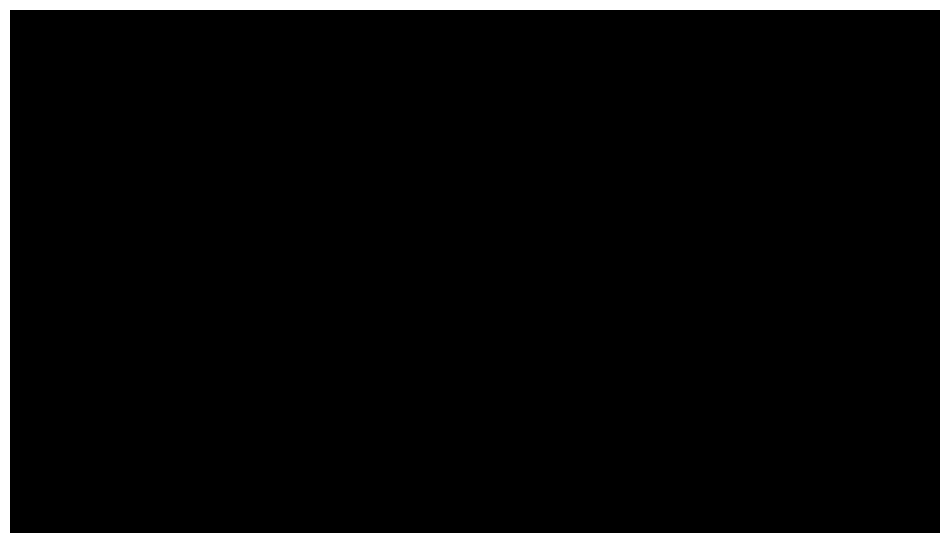

In [ ]:
box_annotator = sv.BoxAnnotator(color=COLOR, thickness=2)
label_annotator = sv.LabelAnnotator(color=COLOR, text_color=sv.Color.BLACK)

frame_generator = sv.get_video_frames_generator(SEGMENTED_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=PLAYER_DETECTION_MODEL_CONFIDENCE, iou_threshold=PLAYER_DETECTION_MODEL_IOU_THRESHOLD)[0]
detections = sv.Detections.from_inference(result)

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections)

sv.plot_image(annotated_frame)

In [ ]:
print(f"Checking video path: {SEGMENTED_VIDEO_PATH}")


Checking video path: /content/extracted_input.mp4


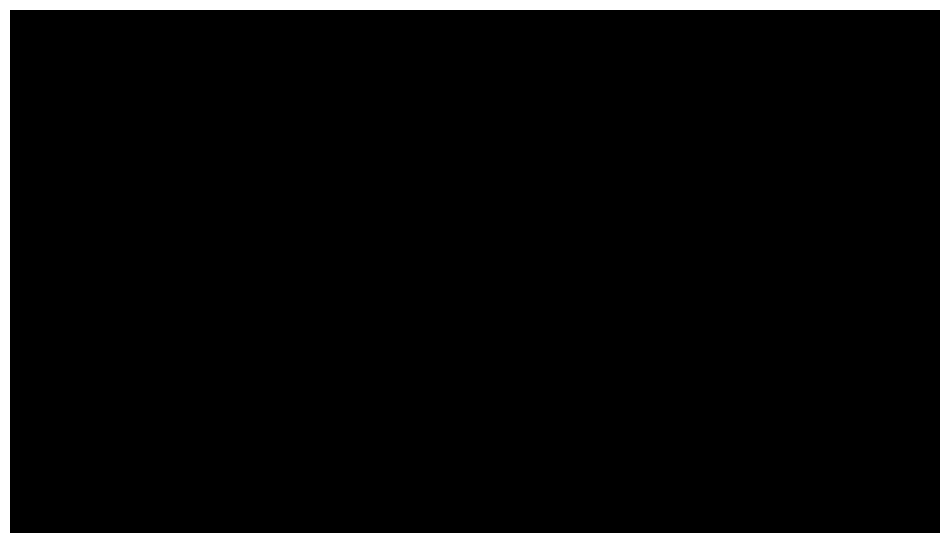

In [ ]:
NUMBER_CLASS_ID = 2

box_annotator = sv.BoxAnnotator(color=COLOR, thickness=2)
label_annotator = sv.LabelAnnotator(color=COLOR, text_color=sv.Color.BLACK)

frame_generator = sv.get_video_frames_generator(SEGMENTED_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=PLAYER_DETECTION_MODEL_CONFIDENCE, iou_threshold=PLAYER_DETECTION_MODEL_IOU_THRESHOLD)[0]
detections = sv.Detections.from_inference(result)
detections = detections[detections.class_id == NUMBER_CLASS_ID]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections)

sv.plot_image(annotated_frame)

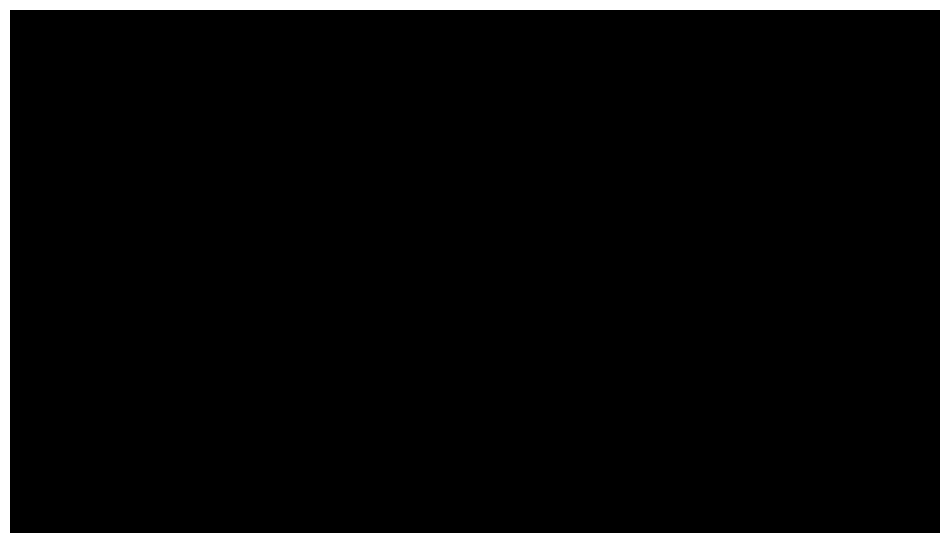

In [ ]:
import numpy as np
PLAYER_CLASS_IDS = [3, 4, 5, 6, 7] # player, player-in-possession, player-jump-shot, player-layup-dunk, player-shot-block

box_annotator = sv.BoxAnnotator(color=COLOR, thickness=2)
label_annotator = sv.LabelAnnotator(color=COLOR, text_color=sv.Color.BLACK)

frame_generator = sv.get_video_frames_generator(SEGMENTED_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=PLAYER_DETECTION_MODEL_CONFIDENCE, iou_threshold=PLAYER_DETECTION_MODEL_IOU_THRESHOLD)[0]
detections = sv.Detections.from_inference(result)
detections = detections[np.isin(detections.class_id, PLAYER_CLASS_IDS)]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections)

sv.plot_image(annotated_frame)

In [ ]:
SOURCE_VIDEO_PATH = Path(SOURCE_VIDEO_PATH)
SEGMENTED_VIDEO_PATH = Path(SEGMENTED_VIDEO_PATH)


TARGET_VIDEO_PATH = HOME / f"{SOURCE_VIDEO_PATH.stem}-detection{SOURCE_VIDEO_PATH.suffix}"
TARGET_VIDEO_COMPRESSED_PATH = HOME / f"{TARGET_VIDEO_PATH.stem}-detection{TARGET_VIDEO_PATH.suffix}"

box_annotator = sv.BoxAnnotator(color=COLOR, thickness=2)
label_annotator = sv.LabelAnnotator(color=COLOR, text_color=sv.Color.BLACK)

def callback(frame: np.ndarray, index: int) -> np.ndarray:
    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=PLAYER_DETECTION_MODEL_CONFIDENCE, iou_threshold=PLAYER_DETECTION_MODEL_IOU_THRESHOLD)[0]
    detections = sv.Detections.from_inference(result)

    annotated_frame = frame.copy()
    annotated_frame = box_annotator.annotate(
        scene=annotated_frame,
        detections=detections)
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame,
        detections=detections)
    return annotated_frame

sv.process_video(
    source_path=SEGMENTED_VIDEO_PATH,
    target_path=TARGET_VIDEO_PATH,
    callback=callback,
    show_progress=True
)

Processing video:   0%|          | 0/8992 [00:00<?, ?it/s]

In [ ]:
!ffmpeg -y -loglevel error -i "{TARGET_VIDEO_PATH}" -vcodec libx264 -crf 28 "{TARGET_VIDEO_COMPRESSED_PATH}"

In [ ]:
# Install and start Ollama in Colab
!curl -fsSL https://ollama.ai/install.sh | sh
!ollama serve > /content/ollama.log 2>&1 &

# Wait for it to start
import time
time.sleep(30)

# Pull the models
!ollama pull llama3.2
!ollama pull nomic-embed-text

# Test if it's working
!curl -s http://localhost:11434/api/tags && echo " Ollama is ready!"

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


{"models":[{"name":"nomic-embed-text:latest","model":"nomic-embed-text:latest","modified_at":"2025-11-22T00:02:47.15552579Z","size":274302450,"digest":"0a109f422b47e3a30ba2b10eca18548e944e8a23073ee3f3e947efcf3c45e59f","details":{"parent_model":"","format":"gguf","family":"nomic-bert","families":["nomic-bert"],"parameter_size":"137M","quantization_level":"F16"}},{"name":"llama3.2:latest","model":"llama3.2:latest","modified_at":"2025-11-22T00:02:39.199692953Z","size":2019393189,"digest":"a80c4f17acd55265feec403c7aef86be0c25983ab279d83f3bcd3abbcb5b8b72","details":{"parent_model"

In [ ]:
transcript_path = '/content/transcript.txt'

In [ ]:
class PlayerAction:
    timestamp_original_video: float
    player: str
    action: str
    description: str

def get_detections_description(frame, model, confidence=0.5, iou_threshold=0.5):
    """
    Use player detection model to analyze frame and describe what's happening
    """
    result = model.infer(frame, confidence=confidence, iou_threshold=iou_threshold)[0]
    detections = sv.Detections.from_inference(result)

    if len(detections) == 0:
        return "No players detected"

    # Get frame dimensions
    h, w = frame.shape[:2]

    # Analyze player positions
    num_players = len(detections)

    # Get bounding boxes and positions
    positions = []
    for bbox in detections.xyxy:
        x1, y1, x2, y2 = bbox
        center_x = (x1 + x2) / 2
        center_y = (y1 + y2) / 2

        # Determine zone
        if center_x < w / 3:
            zone_x = "left"
        elif center_x > 2 * w / 3:
            zone_x = "right"
        else:
            zone_x = "center"

        if center_y < h / 3:
            zone_y = "near"
        elif center_y > 2 * h / 3:
            zone_y = "far"
        else:
            zone_y = "middle"

        positions.append(f"{zone_y} {zone_x}")

    # Create description of detected positions
    description = f"{num_players} players detected at: {', '.join(positions)}"
    return description

def parse_actions_response(response_text, timestamp_original_video):
    """Parse the VLM response into structured player actions"""
    actions = []
    lines = response_text.strip().split('\n')

    for line in lines:
        if '|' in line:
            try:
                parts = line.split('|')
                player = parts[0].replace('Player:', '').strip()
                action = parts[1].replace('Action:', '').strip()
                details = parts[2].replace('Details:', '').strip() if len(parts) > 2 else ""

                # Standardize action types
                action_lower = action.lower()
                if 'shoot' in action_lower or 'shot' in action_lower:
                    standardized_action = 'Shooting'
                elif 'pass' in action_lower or 'assist' in action_lower:
                    standardized_action = 'Passing'
                elif 'dribble' in action_lower:
                    standardized_action = 'Dribbling'
                elif 'rebound' in action_lower:
                    standardized_action = 'Rebounding'
                elif 'defend' in action_lower or 'guard' in action_lower:
                    standardized_action = 'Defending'
                elif 'cut' in action_lower or 'move' in action_lower:
                    standardized_action = 'Moving'
                else:
                    standardized_action = action

                actions.append(PlayerAction(
                    timestamp_original_video=timestamp_original_video,
                    player=player,
                    action=standardized_action,
                    description=details
                ))

            except Exception as e:
                continue

    return actions

def detect_player_actions(frame, timestamp_original_video):
    """Use Ollama to detect specific player actions in the frame"""
    # Get detections description for VLM context
    detections_description = get_detections_description(
        frame, PLAYER_DETECTION_MODEL, 
        confidence=PLAYER_DETECTION_MODEL_CONFIDENCE,
        iou_threshold=PLAYER_DETECTION_MODEL_IOU_THRESHOLD
    )

    img = Image.fromarray(frame)
    buffer = io.BytesIO()
    img.save(buffer, format='JPEG')
    image_data = base64.b64encode(buffer.getvalue()).decode('utf-8')

    response = ollama.chat(
        model='llava',
        messages=[{
            'role': 'user',
            'content': f'''Analyze this basketball frame and identify what specific actions players are performing.

Player detection results: {detections_description}

For each player you see, describe:
1. What action they are performing (shooting, passing, dribbling, rebounding, defending, assisting, etc)
2. Which player it is (describe by position, jersey color, or role)
3. Brief description of what they're doing

Format your response as:
Player: [description] | Action: [specific action] | Details: [what they're doing]
If no specific actions are clearly visible or detectable, respond with "No clear player actions detected."''',
            'images': [image_data]
        }]
    )

    response_text = response['message']['content'].strip()
    # print(f"Ollama raw response for timestamp {timestamp_original_video:.2f}s: {response_text}") 
    if response_text == "No clear player actions detected." or not response_text:
        return [] # Return empty list if no clear actions or empty response

    return parse_actions_response(response_text, timestamp_original_video)

def analyze_video_for_player_actions(video_path, interval_seconds=5):
    """Analyze video at intervals to detect player actions"""
    all_actions_for_clip = []

    # Create a temporary re-encoded video path
    temp_reencoded_path = video_path.replace('.mp4', '_reencoded.mp4')

    # Re-encode the video for better compatibility with OpenCV
    #print(f"Re-encoding {video_path} to {temp_reencoded_path} for robust OpenCV reading...")
    ffmpeg_command = [
        'ffmpeg',
        '-i', video_path,
        '-c:v', 'libx264',
        '-preset', 'veryfast',
        '-crf', '23',
        '-c:a', 'aac',
        '-b:a', '128k',
        '-y',
        temp_reencoded_path
    ]
    try:
        subprocess.run(ffmpeg_command, check=True, capture_output=True, text=True)
        print("Re-encoding complete.")
    except subprocess.CalledProcessError as e:
        print(f"Error re-encoding {video_path}: {e.stderr}")
        return [] # Return early if re-encoding fails

    cap = cv2.VideoCapture(temp_reencoded_path)

    if not cap.isOpened():
        print(f"Error: Could not open video {temp_reencoded_path}")
        # Clean up temp file even if opening fails
        if os.path.exists(temp_reencoded_path):
            os.remove(temp_reencoded_path)
        return []

    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames_in_clip = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"Re-encoded Video: {temp_reencoded_path}, FPS: {fps}, Total frames: {total_frames_in_clip}")

    if fps <= 0:
        print(f"Error: Invalid FPS for video {temp_reencoded_path}. Using default 30 FPS.")
        fps = 30 # Default to 30 FPS if not available

    video_duration_in_clip = total_frames_in_clip / fps if fps > 0 else 0

    # Ensure video_duration_in_clip is not negative or zero
    if video_duration_in_clip <= 0:
        print(f"Warning: Calculated clip duration is non-positive for {temp_reencoded_path}. Skipping analysis for this clip.")
        cap.release()
        os.remove(temp_reencoded_path) # Clean up temp file
        return []

    # Iterate through time points within the clip
    for current_time_in_clip in np.arange(0, video_duration_in_clip, interval_seconds):
        frame_to_read = int(current_time_in_clip * fps)

        # Set position and read frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_to_read)
        ret, frame = cap.read()

        if not ret:
            print(f"Warning: Could not read frame at index {frame_to_read} (time {current_time_in_clip:.2f}s) for video {temp_reencoded_path}. Skipping this interval.")
            continue

        actions = detect_player_actions(frame, current_time_in_clip)  # Use clip-relative timestamp
        if actions:
            print(f"  Detected {len(actions)} actions.")
            for action in actions:
                print(f"    Player: {action.player} | Action: {action.action} | Details: {action.description}")
        else:
            print("  No actions detected for this frame.")

        all_actions_for_clip.extend(actions)

    cap.release()
    os.remove(temp_reencoded_path) # Clean up temp file
    return all_actions_for_clip

def create_actions_dataframe(actions):
    """Convert actions to pandas DataFrame for display"""
    data = []
    for action in actions:
        minutes = int(action.timestamp_original_video // 60)
        seconds = action.timestamp_original_video % 60
        timestamp_str = f"{minutes:02d}:{seconds:05.2f}"

        data.append({
            'Original Timestamp': timestamp_str,
            'Player': action.player,
            'Action': action.action,
            'Description': action.description
        })

    return pd.DataFrame(data)

In [ ]:
from logging import Formatter
import re

def format_timestamp(seconds):
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    seconds_remaining = (seconds % 3600) % 60
    return f"{hours:02d}:{minutes:02d}:{seconds_remaining:02d}"

def extract_events_from_transcript(transcript_text: str) -> list:
    event_keywords = [
        'shot', 'three-pointer', 'dunk', 'layup', 'rebound', 'steal',
        'block', 'foul', 'pass', 'assist', 'turnover', 'score', 'possession'
    ]
    extracted_events = []
    time_pattern = r'\[?(\d{1,2}):(\d{2})\]?'

    lines = transcript_text.split('\n')
    for line in lines:
        match = re.search(time_pattern, line)
        if match:
            minutes, seconds = int(match.group(1)), int(match.group(2))
            timestamp_in_seconds = minutes * 60 + seconds
            if timestamp_in_seconds > 300:
                break
            content = re.sub(time_pattern, '', line).strip()

            found_event_type = None
            for keyword in event_keywords:
                if keyword in content.lower():
                    found_event_type = keyword
                    break

            # Record lines with timestamps that contain keyword
            if found_event_type:
                # Store timestamp_in_seconds directly as a number
                extracted_events.append({
                    'timestamp': timestamp_in_seconds,
                    'event_type': found_event_type,
                    'content': content
                })
    return extracted_events

transcript_text = open('/content/transcript.txt', "r").read()
extracted_events = extract_events_from_transcript(transcript_text)

for event in extracted_events:
    print(event)
print(f"\nTotal events extracted: {len(extracted_events)}")

{'timestamp': 50, 'event_type': 'shot', 'content': "And here's one of the fun matchups in this series Anthony Davis has to take a tough shot well defended by Dremont Green ()"}
{'timestamp': 73, 'event_type': 'score', 'content': '25 from him tonight to be able to score enough to win ()'}
{'timestamp': 200, 'event_type': 'pass', 'content': 'Curry throws the pass stolen by Anthony Davis and number one rated defensive team ()'}
{'timestamp': 209, 'event_type': 'rebound', 'content': "Rebound kept the lie by Drummond, but he's gonna be called for a loose ball foul ()"}
{'timestamp': 223, 'event_type': 'rebound', 'content': 'This is his 22nd game started all 21 games average just under 12 points look over 10 rebounds ()'}
{'timestamp': 240, 'event_type': 'shot', 'content': 'Curry using a Dremont Green screen nice feet inside Looney shot block ()'}
{'timestamp': 253, 'event_type': 'block', 'content': "James with the tip in with the left hand and Frank Vogel's I read he thought David Davis got

In [ ]:
import os
import subprocess
import time
from datetime import timedelta

# Define segment window around the event
SEGMENT_PRE_SECONDS = 10
SEGMENT_POST_SECONDS = 5

segmented_video_details = []
temp_video_dir = "/content/temp_event_clips"
os.makedirs(temp_video_dir, exist_ok=True)

# Loop through each extracted event to create video segments
for i, event in enumerate(extracted_events):
    event_timestamp = event['timestamp'] 
    event_type = event['event_type']
    event_content = event['content']

    # Calculate segment start and end times
    segment_start_sec = max(0, event_timestamp - SEGMENT_PRE_SECONDS)
    segment_end_sec = event_timestamp + SEGMENT_POST_SECONDS

    start_hms = format_timestamp(segment_start_sec)
    end_hms = format_timestamp(segment_end_sec)

    # Create a unique output path for each segmented video
    output_filename = f"event_{i:03d}_{event_type}_{int(segment_start_sec)}-{int(segment_end_sec)}.mp4"
    output_path = os.path.join(temp_video_dir, output_filename)

    print(f"Extracting segment for event {i+1}/{len(extracted_events)}: {event_type} at {event_timestamp}s")
    print(f"  From {start_hms} to {end_hms} -> {output_path}")

    ffmpeg_command = [
        'ffmpeg',
        '-i', str(SOURCE_VIDEO_PATH),
        '-ss', start_hms,
        '-to', end_hms,
        '-y', # Overwrite output files without asking
        output_path
    ]

    try:
        # Execute ffmpeg command
        process = subprocess.run(ffmpeg_command, check=True, capture_output=True, text=True)

        # Store details of the segmented video
        segmented_video_details.append({
            'event_id': i,
            'original_event_timestamp': event_timestamp,
            'event_type': event_type,
            'event_content': event_content,
            'segment_start_sec': segment_start_sec,
            'segment_end_sec': segment_end_sec,
            'video_path': output_path
        })

    except subprocess.CalledProcessError as e:
        print(f"Error extracting segment for event {i}: {e}")
        print(f"  Stderr: {e.stderr}")
    except Exception as e:
        print(f"An unexpected error occurred for event {i}: {e}")

print("\n--- All video segments extracted ---")
print(f"Total segmented videos created: {len(segmented_video_details)}")
print(f"Stored in: {temp_video_dir}")

Extracting segment for event 1/8: shot at 50s
  From 00:00:40 to 00:00:55 -> /content/temp_event_clips/event_000_shot_40-55.mp4
Extracting segment for event 2/8: score at 73s
  From 00:01:03 to 00:01:18 -> /content/temp_event_clips/event_001_score_63-78.mp4
Extracting segment for event 3/8: pass at 200s
  From 00:03:10 to 00:03:25 -> /content/temp_event_clips/event_002_pass_190-205.mp4
Extracting segment for event 4/8: rebound at 209s
  From 00:03:19 to 00:03:34 -> /content/temp_event_clips/event_003_rebound_199-214.mp4
Extracting segment for event 5/8: rebound at 223s
  From 00:03:33 to 00:03:48 -> /content/temp_event_clips/event_004_rebound_213-228.mp4
Extracting segment for event 6/8: shot at 240s
  From 00:03:50 to 00:04:05 -> /content/temp_event_clips/event_005_shot_230-245.mp4
Extracting segment for event 7/8: block at 253s
  From 00:04:03 to 00:04:18 -> /content/temp_event_clips/event_006_block_243-258.mp4
Extracting segment for event 8/8: shot at 264s
  From 00:04:14 to 00:04:2

In [14]:
test_file = '/content/temp_event_clips/event_000_basket_0-5.mp4'

In [30]:
import cv2
import pandas as pd
import base64
import io
from typing import List, Dict
from PIL import Image
import ollama

VLM_MODEL = "llava"

class PlayAnalyzer:
    """Simplified analyzer - uses event types from transcript"""

    def __init__(self):
        pass

    def _get_middle_frame(self, video_path: str):
        """Extract the middle frame from a video segment"""
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            return None

        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        middle_frame_idx = total_frames // 2
        cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame_idx)
        ret, frame = cap.read()
        cap.release()
        return frame if ret else None

    def analyze_segments(self, segmented_video_details: List[Dict]) -> pd.DataFrame:
        """
        Create plays table using the event types we already have
        """
        records = []


        for i, segment in enumerate(segmented_video_details):
            #print(f"[{i+1}/{len(segmented_video_details)}] {segment['event_type']} at {segment['original_event_timestamp']}s...", end=" ")

            # Format timestamp
            timestamp = segment['original_event_timestamp']
            mins = int(timestamp // 60)
            secs = int(timestamp % 60)
            timestamp_str = f"{mins:02d}:{secs:02d}"

            # Create record using the event_type as the main play type
            record = {
                'Timestamp': timestamp_str,
                'Event Type': segment['event_type'],
                'Play Type': segment['event_type'],  # Use event_type as play type
                'Description': segment['event_content'],
                'Frame Path': segment['video_path']
            }
            records.append(record)

        df = pd.DataFrame(records)
        print(f"\n Processed {len(df)} plays")
        return df

# Usage
analyzer = PlayAnalyzer()
plays_df = analyzer.analyze_segments(segmented_video_details)

print("\n=== Basketball Plays ===")
print(plays_df[['Timestamp', 'Play Type', 'Description']].to_string())

# Save to CSV
plays_df.to_csv("basketball_plays.csv", index=False)
print("\nSaved to basketball_plays.csv")


 Processed 8 plays

=== Basketball Plays ===
  Timestamp Play Type                                                                                                                                  Description
0     00:50      shot                   And here's one of the fun matchups in this series Anthony Davis has to take a tough shot well defended by Dremont Green ()
1     01:13     score                                                                                     25 from him tonight to be able to score enough to win ()
2     03:20      pass                                                         Curry throws the pass stolen by Anthony Davis and number one rated defensive team ()
3     03:29   rebound                                                          Rebound kept the lie by Drummond, but he's gonna be called for a loose ball foul ()
4     03:43   rebound                                             This is his 22nd game started all 21 games average just under 12 points l

Play Summary

Play 1: 00:50 - shot
  Players: Davis


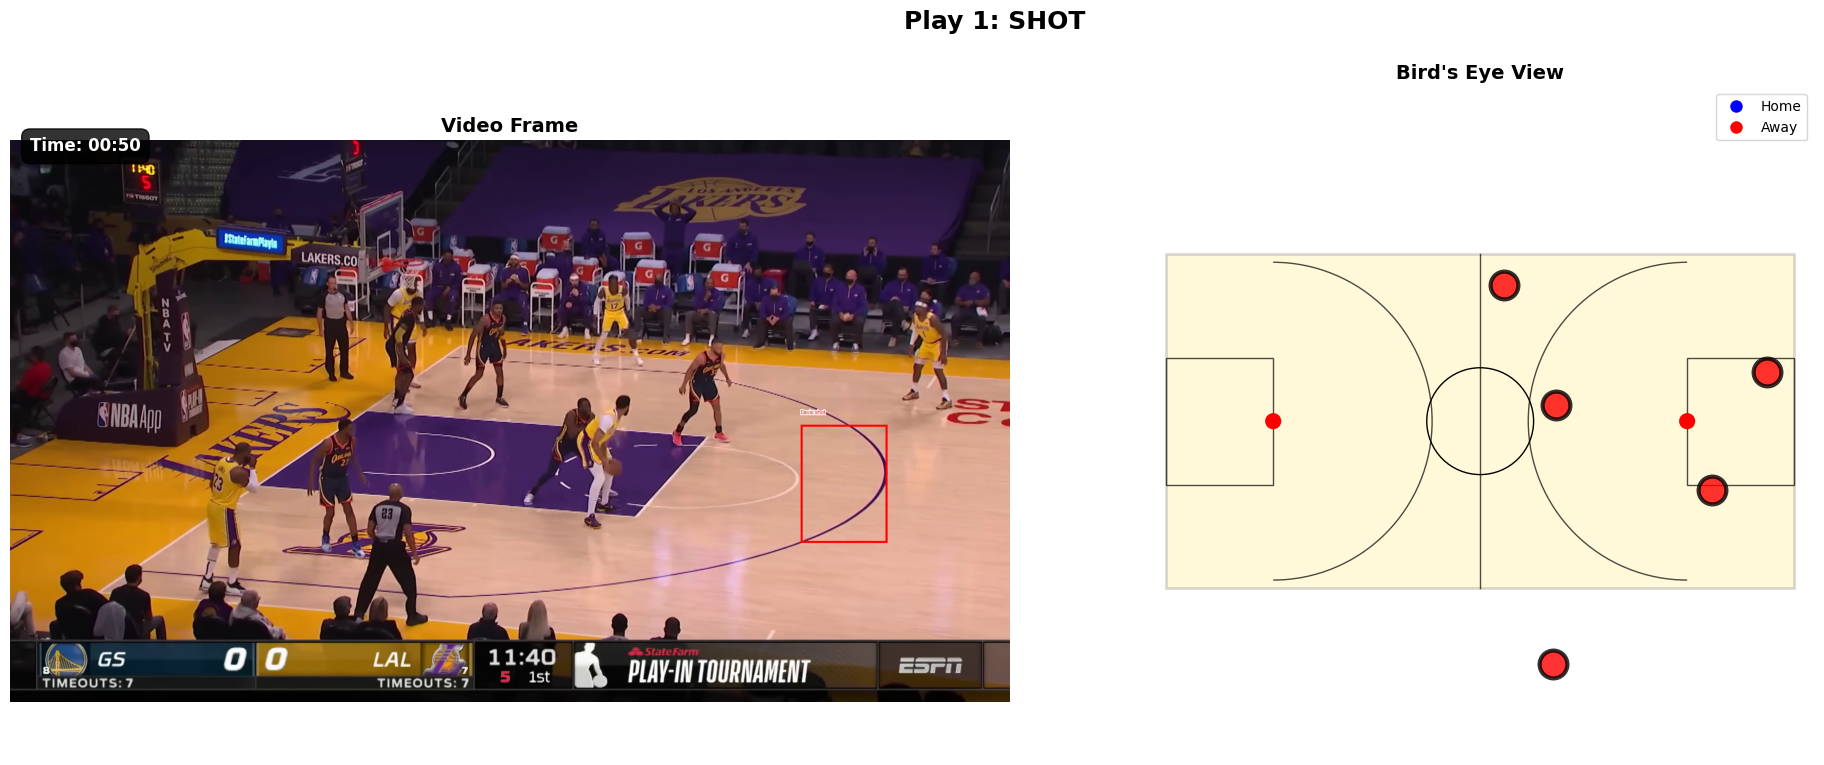

--------------------------------------------------

Play 2: 01:13 - score
  Players: Player


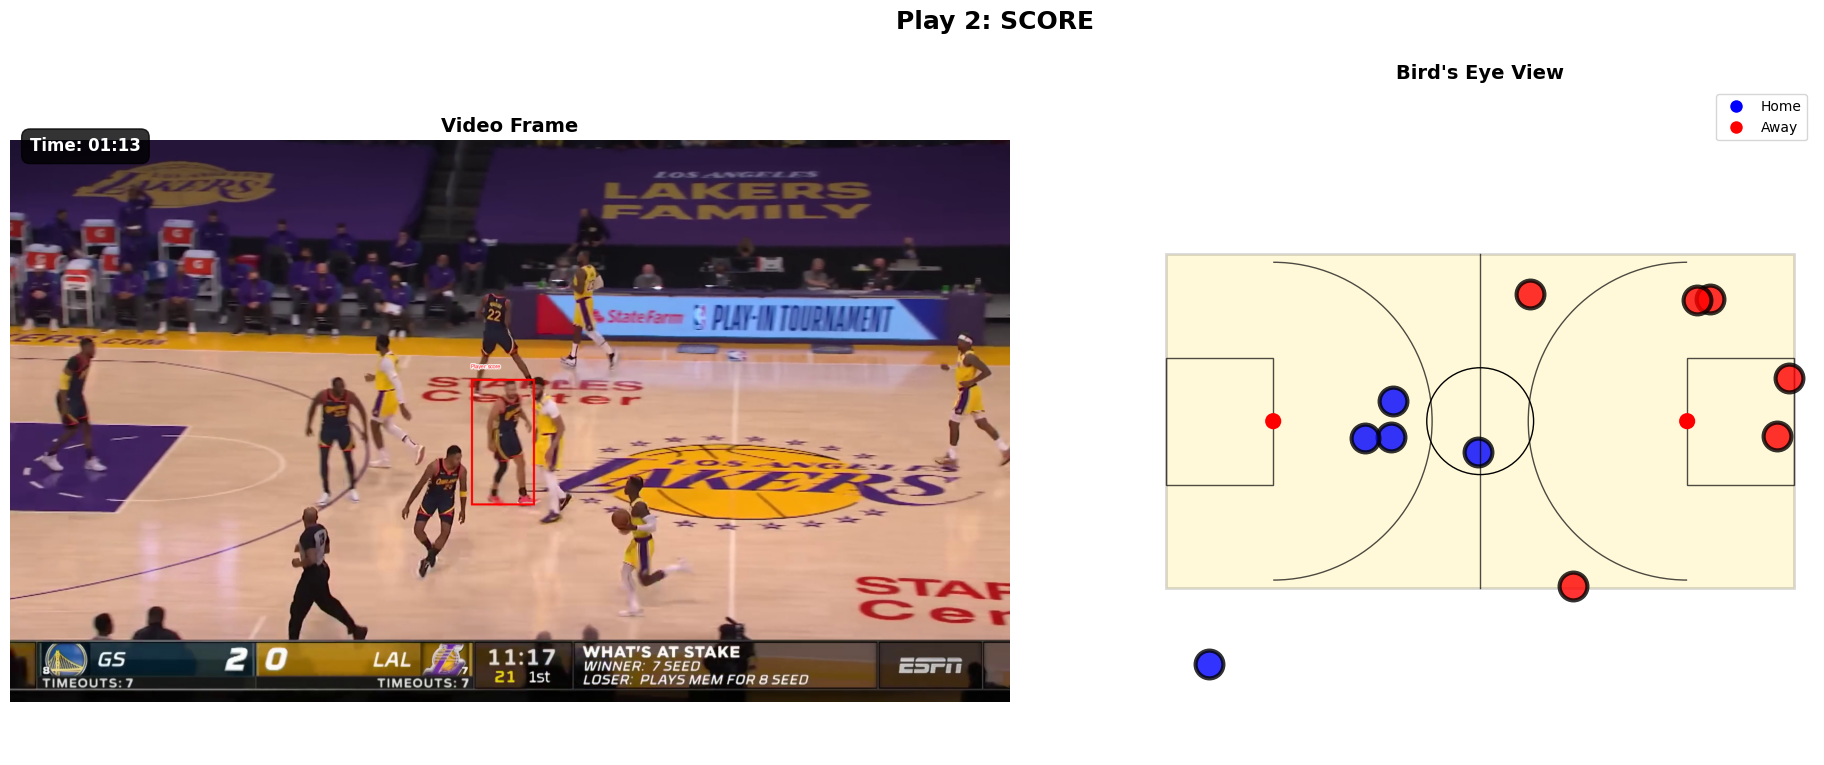

--------------------------------------------------

Play 3: 03:20 - pass
  Players: Curry


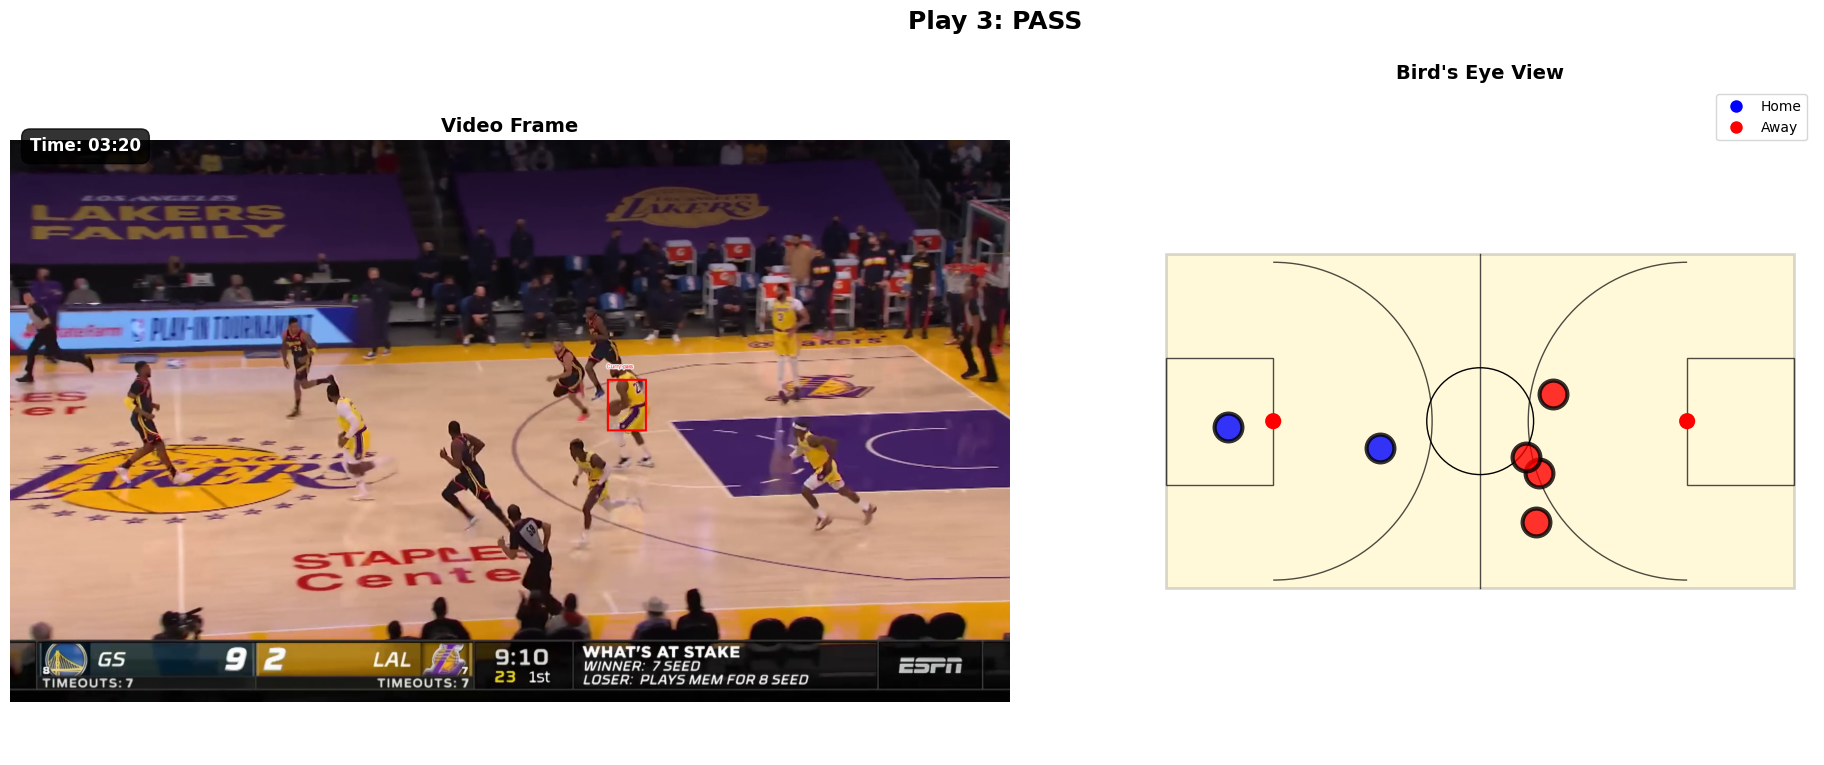

--------------------------------------------------

Play 4: 03:29 - rebound
  Players: Drummond


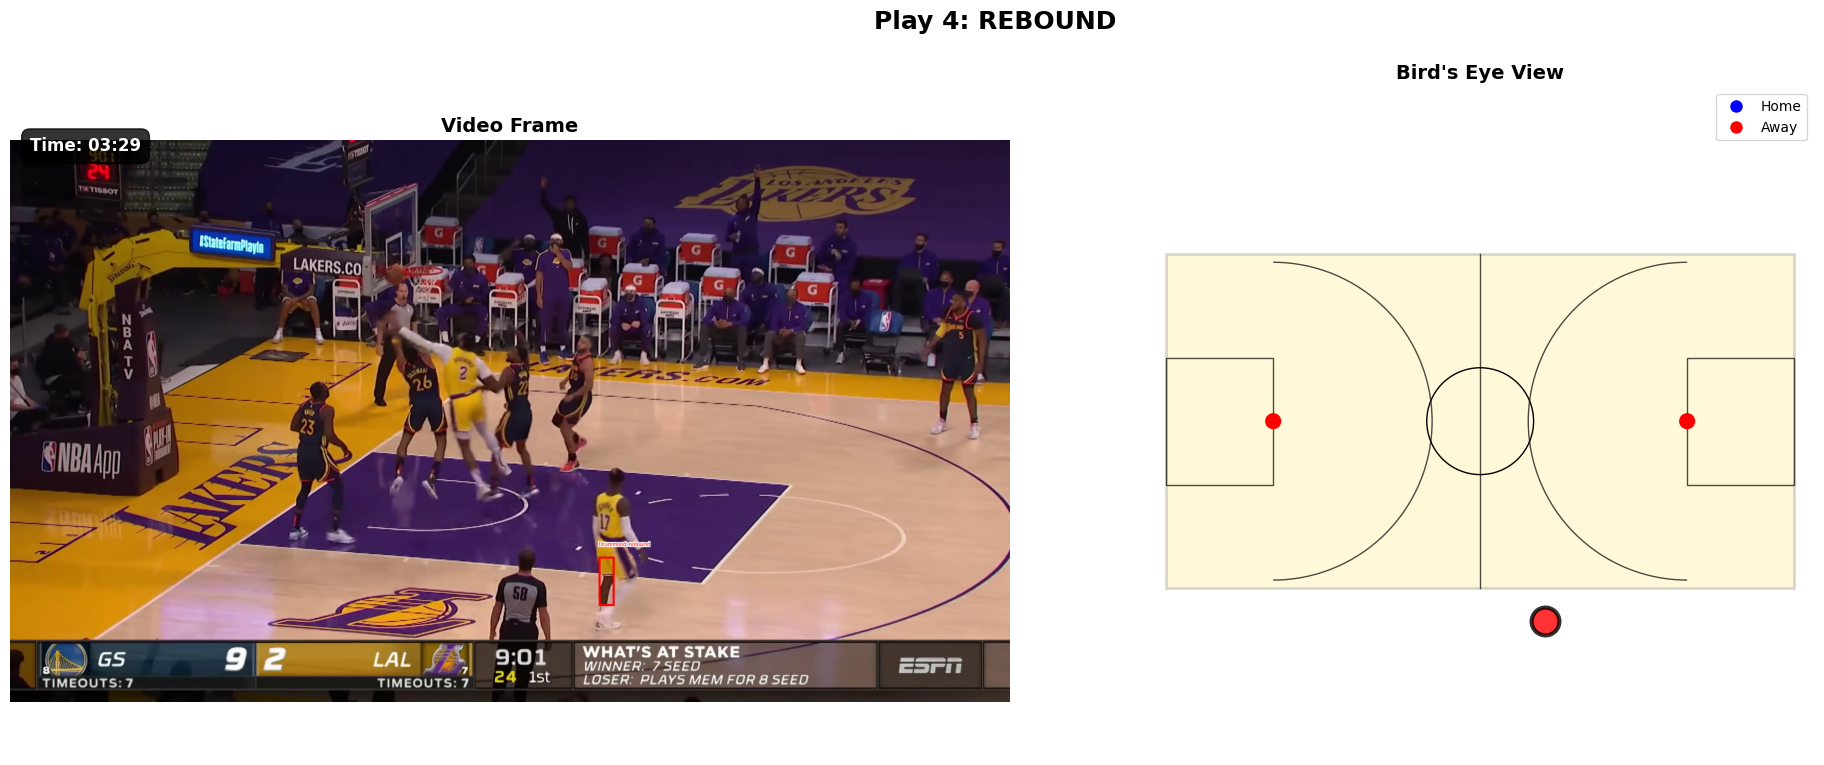

--------------------------------------------------

Play 5: 03:43 - rebound
  Players: Player


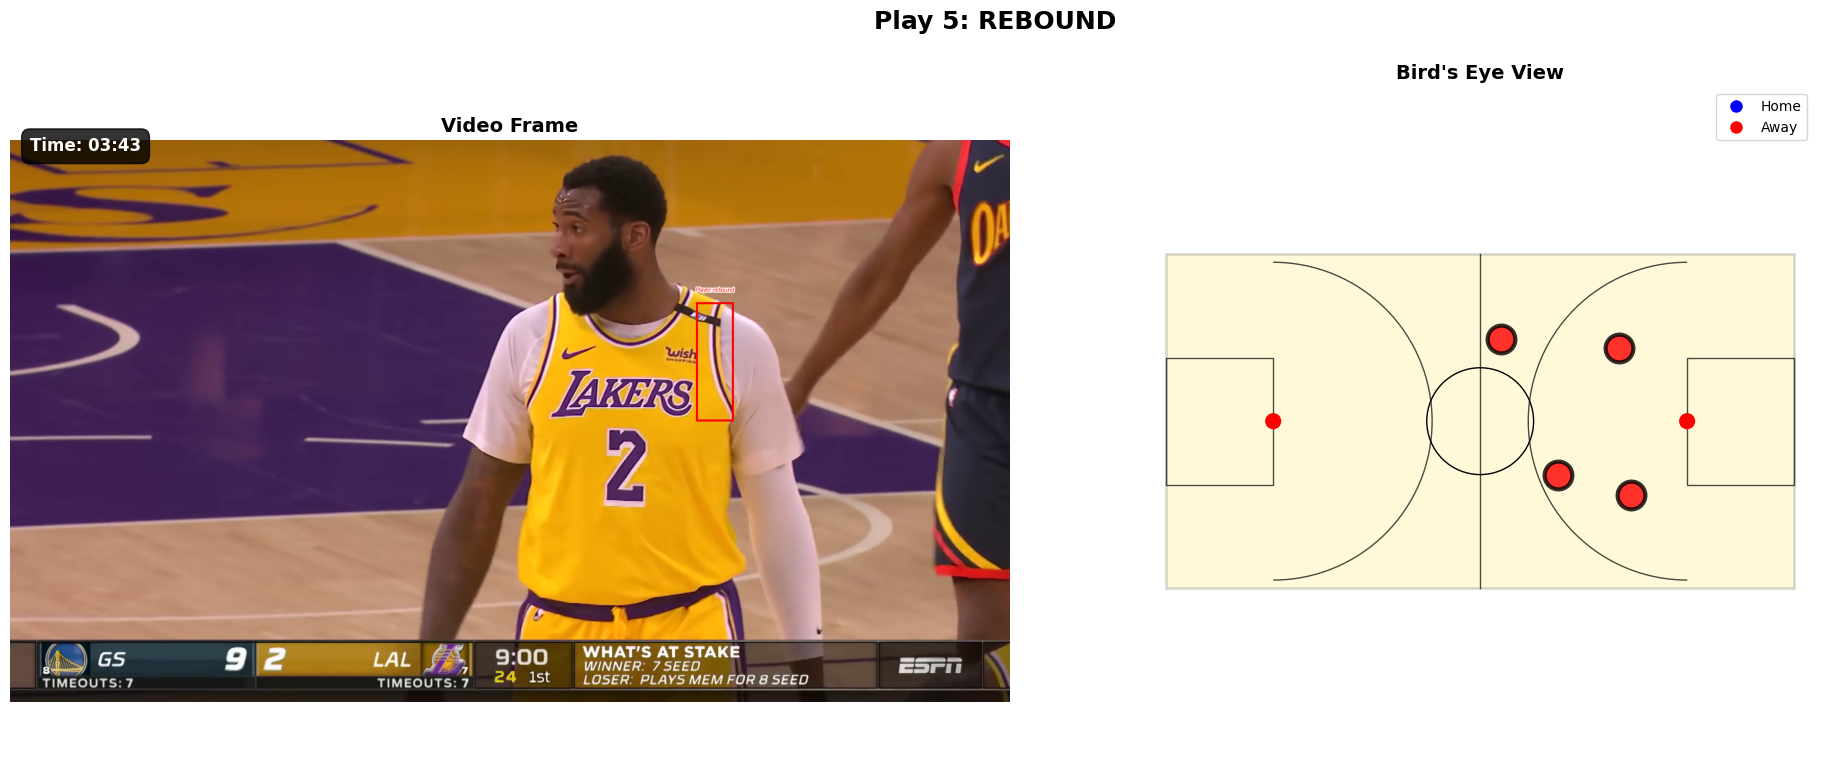

--------------------------------------------------

Play 6: 04:00 - shot
  Players: Curry


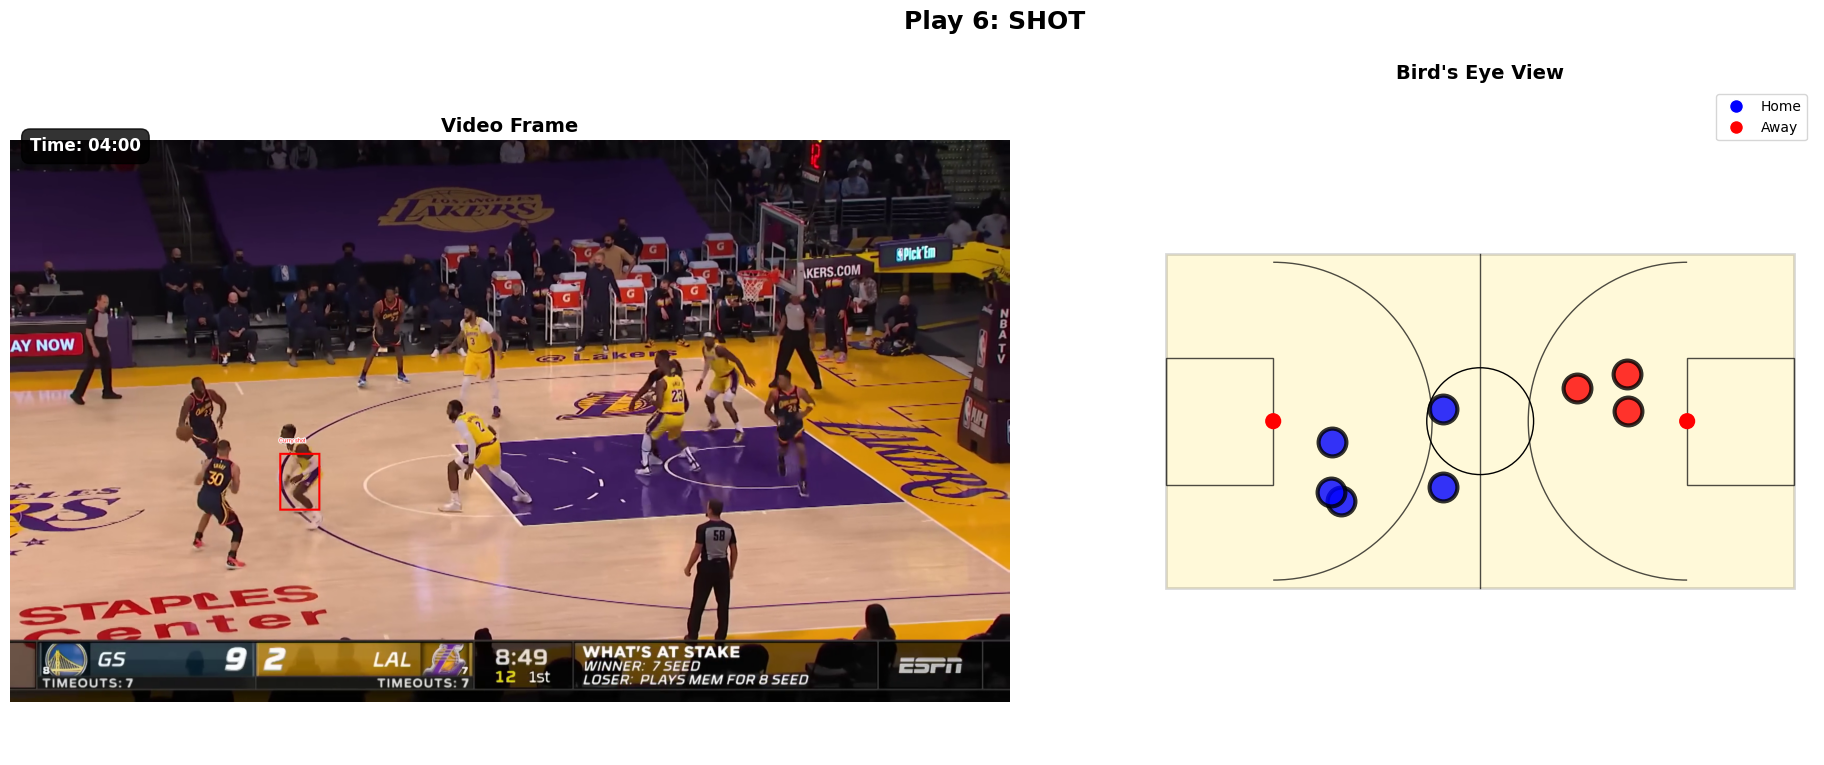

--------------------------------------------------

Play 7: 04:13 - block
  Players: James


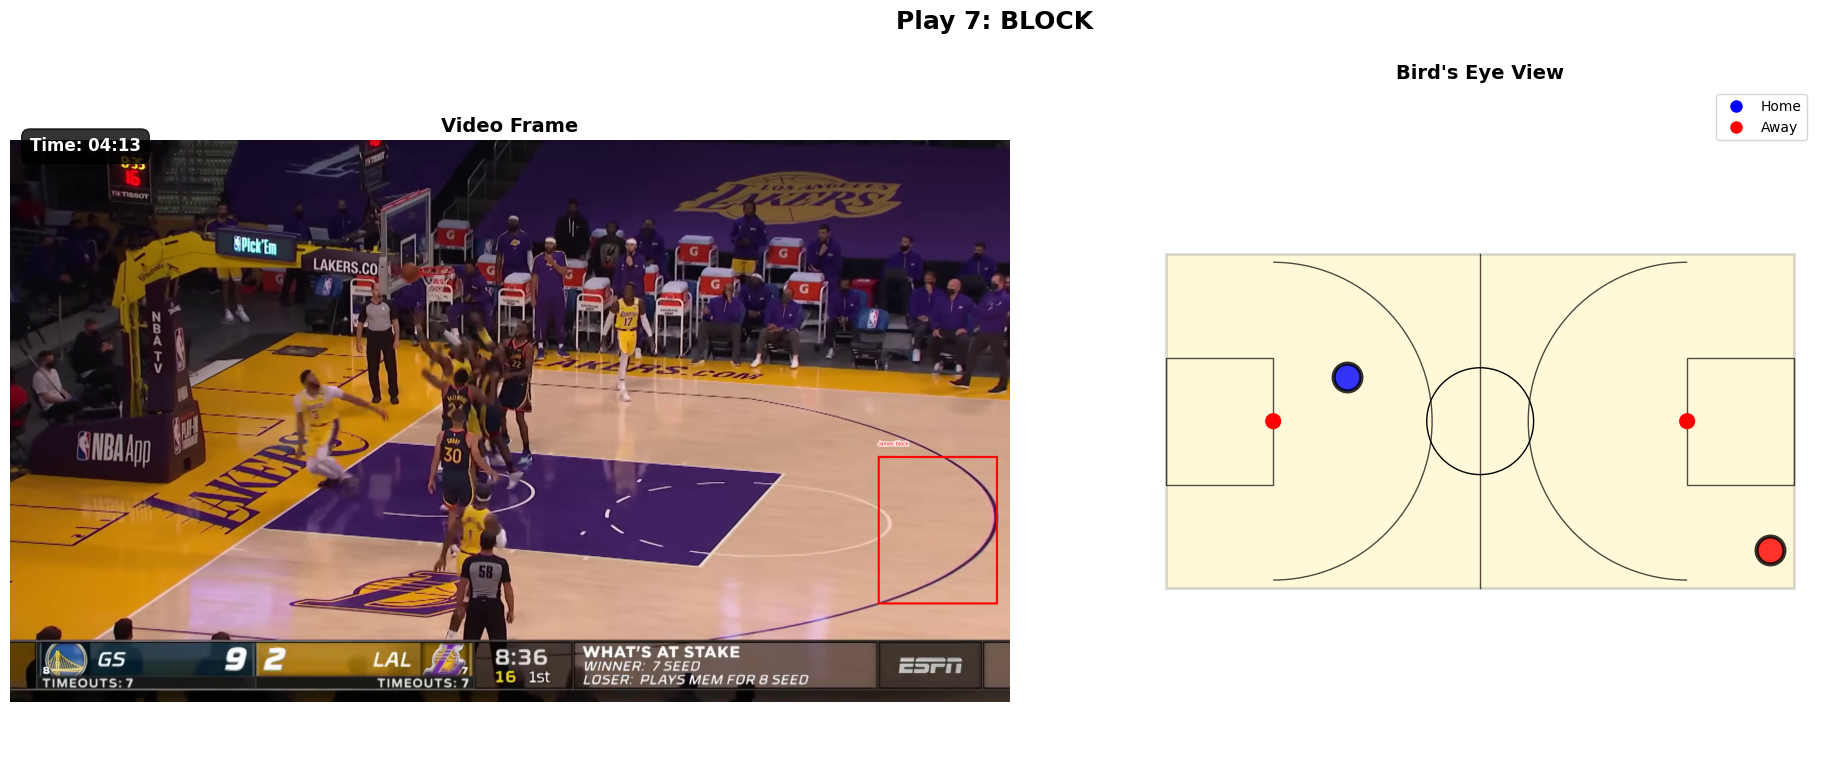

--------------------------------------------------

Play 8: 04:24 - shot
  Players: Curry


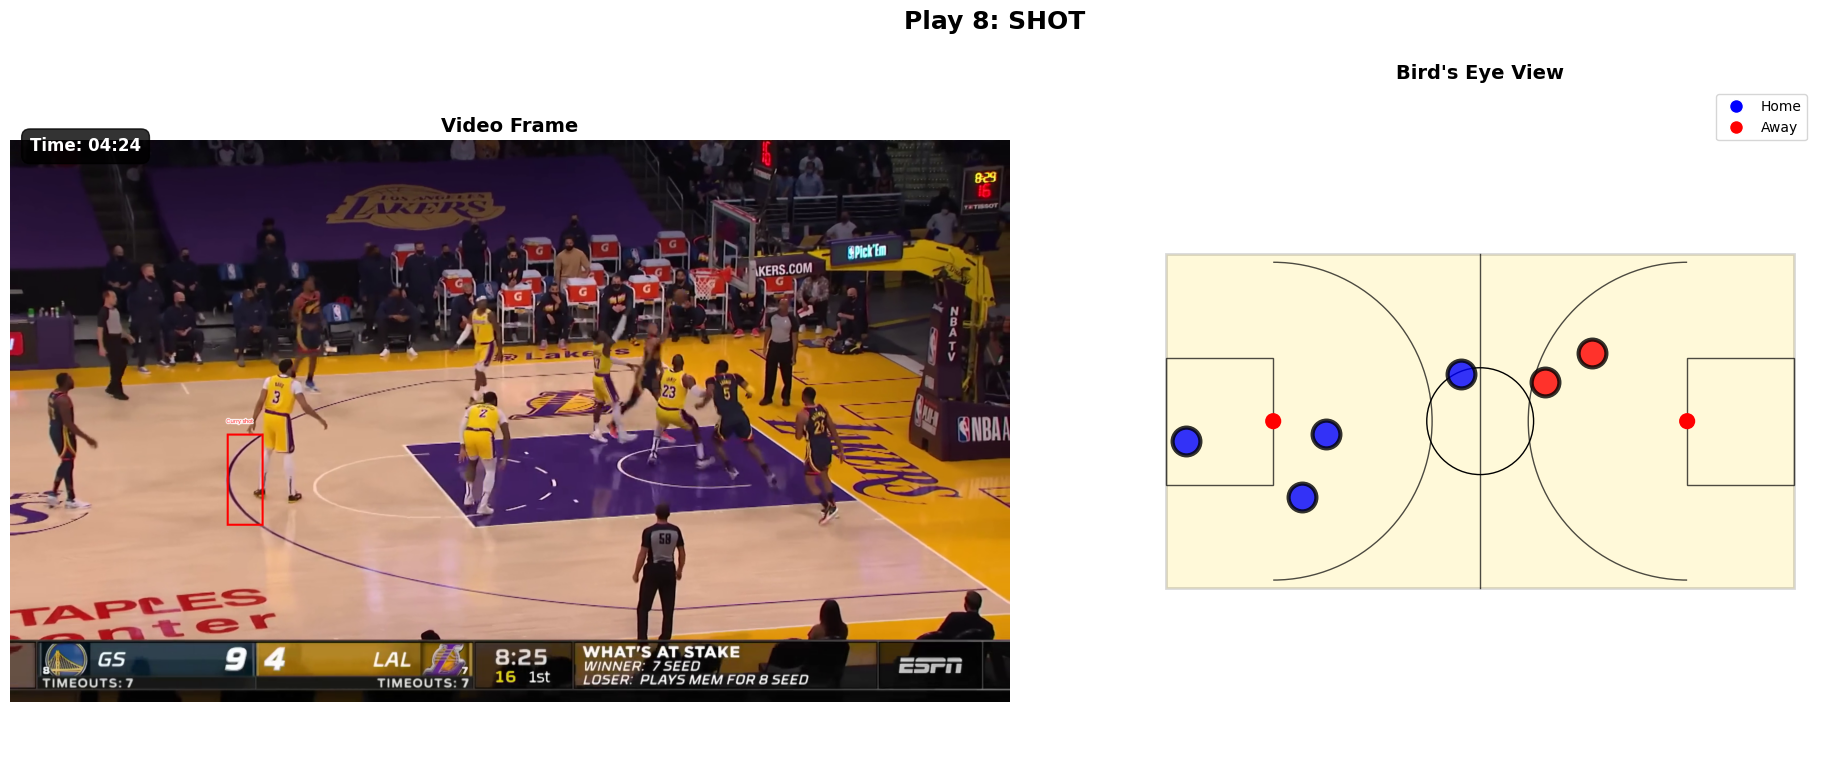

--------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

def display_plays_with_accurate_frames(segmented_video_details, player_data):
    if not segmented_video_details or player_data.empty:
        print("No data available")
        return

    print("Play Summary")
    print("=" * 50)

    # Group player data by timestamp
    timestamps = player_data['timestamp'].unique()

    for i, timestamp in enumerate(timestamps):
        # Find corresponding video segment
        segment = None
        for seg in segmented_video_details:
            if format_timestamp(seg['original_event_timestamp']) == timestamp:
                segment = seg
                break

        if segment is None:
            continue

        player_name = extract_player_from_transcript(segment['event_content'])

        # Print play header
        print(f"\nPlay {i+1}: {timestamp} - {segment['event_type']}")
        print(f"  Players: {player_name}")

        # Get the frame
        frame = get_frame_at_timestamp(segment['video_path'], segment['original_event_timestamp'])
        if frame is not None:
            # Convert to PIL for drawing
            frame_with_boxes = draw_player_on_frame_simple(frame, player_name, segment['event_type'])

            # Create side by side layout
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

            # Left: Video frame
            ax1.imshow(frame_with_boxes)
            ax1.set_title('Video Frame', fontsize=14, weight='bold')
            ax1.axis('off')
            ax1.text(0.02, 0.98, f'Time: {timestamp}', transform=ax1.transAxes,
                    fontsize=12, weight='bold', color='white',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='black', alpha=0.8))

            # Right: Court diagram with REAL player data
            draw_clean_court(ax2)

            # Get player positions for this play
            play_players = player_data[player_data['timestamp'] == timestamp]

            # Plot players on court
            for _, player in play_players.iterrows():
                team = player['team']
                color = 'blue' if team == 'Home' else 'red' if team == 'Away' else 'gray'

                ax2.scatter(player['court_x'], player['court_y'],
                          c=color, marker='o', s=400, alpha=0.8,
                          edgecolors='black', linewidth=3)

            ax2.set_xlim(0, 1)
            ax2.set_ylim(0, 1)
            ax2.set_aspect('equal')
            ax2.axis('off')
            ax2.set_title('Bird\'s Eye View', fontsize=14, weight='bold')

            # Add team legend
            legend_elements = [
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Home'),
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Away')
            ]
            ax2.legend(handles=legend_elements, loc='upper right', fontsize=10)

            # Main title
            fig.suptitle(f'Play {i+1}: {segment["event_type"].upper()}', fontsize=18, weight='bold', y=0.95)

            plt.tight_layout(rect=[0, 0, 1, 0.95])
            plt.show()
        else:
            print("  [Could not load image]")

        print("-" * 50)

# Run with real player data
display_plays_with_accurate_frames(segmented_video_details, player_df)

def draw_player_on_frame_simple(frame, player_name, action):
    """The original working function to draw player on frame"""
    # Convert PIL to numpy for detection
    frame_np = np.array(frame)

    # Detect players in frame
    player_bboxes = detect_players_improved(frame_np)

    # Convert back to PIL for drawing
    frame_with_boxes = frame.copy()
    draw = ImageDraw.Draw(frame_with_boxes)

    if player_bboxes:
        # Use the largest detected player
        largest_bbox = max(player_bboxes, key=lambda bbox: bbox[2] * bbox[3])
        x, y, w, h = largest_bbox

        # Convert from center to corner coordinates
        x1 = x - w // 2
        y1 = y - h // 2
        x2 = x + w // 2
        y2 = y + h // 2

        # Draw bounding box
        draw.rectangle([x1, y1, x2, y2], outline='red', width=4)

        # Draw label
        label = f"{player_name}: {action}"
        draw.text((x1, y1 - 30), label, fill='red', stroke_width=2, stroke_fill='white')
    else:
        # Fallback: just add text annotation
        draw.text((50, 50), f"{player_name}: {action}", fill='red', stroke_width=2, stroke_fill='white')

    return frame_with_boxes

def create_simplified_play_diagrams(player_data, output_dir="simplified_play_diagrams"):
    """Create simplified court diagrams showing only key players for each play"""

    if player_data.empty:
        print("No player data available")
        return

    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Group by timestamp (each timestamp represents a different play)
    timestamps = player_data['timestamp'].unique()


    for i, timestamp in enumerate(timestamps):
        # Get players for this specific play
        play_players = player_data[player_data['timestamp'] == timestamp]

        # Get the main action type for this play
        main_action = play_players['action_type'].iloc[0] if len(play_players) > 0 else 'Unknown'

        # Create figure for this play
        fig, ax = plt.subplots(figsize=(10, 8))

        # Draw the basketball court
        draw_clean_court(ax)

        # Plot only the key players involved in this play
        for _, player in play_players.iterrows():
            team = player['team']
            player_name = player['player_name']

            color = 'blue' if team == 'Home' else 'red' if team == 'Away' else 'gray'

            # Plot player position
            ax.scatter(player['court_x'], player['court_y'],
                      c=color, marker='o', s=400, alpha=0.8,
                      edgecolors='black', linewidth=3)

            # Add only player name (no action label)
            ax.annotate(player_name,
                       (player['court_x'], player['court_y']),
                       xytext=(0, 15), textcoords='offset points',
                       fontsize=12, ha='center', va='bottom', weight='bold',
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))

        # Set court boundaries
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_aspect('equal')
        ax.axis('off')

        # Add clean title
        title = f'Play {i+1}: {main_action.upper()}'
        ax.set_title(title, fontsize=16, pad=20, weight='bold')

        # Add timestamp below title
        ax.text(0.5, 0.94, f'Time: {timestamp}', transform=ax.transAxes,
               ha='center', fontsize=11, style='italic')

        plt.tight_layout()

        # Save simplified play diagram
        filename = f"{output_dir}/play_{i+1:02d}_{main_action}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.close()

def draw_clean_court(ax):
    """Draw a clean basketball court without too many labels"""
    # Court dimensions
    court_length = 0.94
    court_width = 0.50
    court_x = (1 - court_length) / 2
    court_y = (1 - court_width) / 2

    # Court outline
    court = patches.Rectangle((court_x, court_y), court_length, court_width,
                             linewidth=2, edgecolor='black', facecolor='#FFD700', alpha=0.15)
    ax.add_patch(court)

    # Center circle
    center_circle = patches.Circle((0.5, 0.5), 0.08, linewidth=1, edgecolor='black', fill=False)
    ax.add_patch(center_circle)

    # Center line
    ax.plot([0.5, 0.5], [court_y, court_y + court_width], 'black', linewidth=1, alpha=0.7)

    # Free throw lanes (keys)
    key_width = 0.16
    key_height = 0.19

    # Left key
    left_key = patches.Rectangle((court_x, 0.5 - key_height/2), key_width, key_height,
                               linewidth=1, edgecolor='black', fill=False, alpha=0.7)
    ax.add_patch(left_key)

    # Right key
    right_key = patches.Rectangle((1 - court_x - key_width, 0.5 - key_height/2), key_width, key_height,
                                linewidth=1, edgecolor='black', fill=False, alpha=0.7)
    ax.add_patch(right_key)

    # Three point lines (simplified)
    three_pt_radius = 0.238
    left_three_pt = patches.Arc((court_x + key_width, 0.5), three_pt_radius*2, three_pt_radius*2,
                              angle=0, theta1=-90, theta2=90, linewidth=1, edgecolor='black', alpha=0.7)
    ax.add_patch(left_three_pt)

    right_three_pt = patches.Arc((1 - court_x - key_width, 0.5), three_pt_radius*2, three_pt_radius*2,
                               angle=0, theta1=90, theta2=270, linewidth=1, edgecolor='black', alpha=0.7)
    ax.add_patch(right_three_pt)

    # Hoops
    left_hoop = patches.Circle((court_x + key_width, 0.5), 0.01, linewidth=2,
                             edgecolor='red', facecolor='red')
    ax.add_patch(left_hoop)

    right_hoop = patches.Circle((1 - court_x - key_width, 0.5), 0.01, linewidth=2,
                              edgecolor='red', facecolor='red')
    ax.add_patch(right_hoop)

#birds eye only 
def create_clean_montage(player_data, output_path="clean_plays_montage.png"):
    """Create a clean montage of all play diagrams"""

    if player_data.empty:
        return

    timestamps = player_data['timestamp'].unique()
    n_plays = len(timestamps)

    # Create subplot grid
    cols = 4
    rows = (n_plays + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))

    # Flatten axes array
    if rows == 1:
        axes = [axes] if cols == 1 else axes
    else:
        axes = axes.flatten()

    for i, timestamp in enumerate(timestamps):
        if i < len(axes):
            ax = axes[i]
            play_players = player_data[player_data['timestamp'] == timestamp]
            main_action = play_players['action_type'].iloc[0] if len(play_players) > 0 else 'Unknown'

            # Draw clean court
            draw_clean_court(ax)

            # Plot key players
            for _, player in play_players.iterrows():
                team = player['team']
                color = 'blue' if team == 'Home' else 'red' if team == 'Away' else 'gray'

                ax.scatter(player['court_x'], player['court_y'],
                          c=color, marker='o', s=200, alpha=0.8,
                          edgecolors='black', linewidth=2)


            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.set_aspect('equal')
            ax.axis('off')
            ax.set_title(f'{main_action.upper()}\n{timestamp}', fontsize=12, pad=10)

    # Hide unused subplots
    for i in range(len(timestamps), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()